<a href="https://colab.research.google.com/github/Mastermrinal/personal_project-/blob/main/apple_stocks_forcasting_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Auto regressive integrated moving average
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style="seaborn")
%matplotlib inline

<ipython-input-2-1cdd96186e1c>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style="seaborn")


In [ ]:
df=pd.read_csv("/content/AAPL.csv")


In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,19/01/2010,7.440357,7.685357,7.401429,7.680000,6.546569,730007600
1,20/01/2010,7.675357,7.698214,7.482143,7.561786,6.445801,612152800
2,21/01/2010,7.574286,7.618214,7.400357,7.431071,6.334380,608154400
3,22/01/2010,7.385000,7.410714,7.041429,7.062500,6.020201,881767600
4,25/01/2010,7.232500,7.310714,7.149643,7.252500,6.182161,1065699600


In [ ]:
df=df[["Close"]].copy()


In [ ]:
df.describe()

,Close
count,2749.000000
mean,33.517069
std,23.890526
min,6.858929
25%,17.560715
50%,26.987499
75%,42.877499
max,134.179993


In [ ]:
##STATIONARITY 
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.Close.dropna())
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")


ADF Statistic:3.218071588934831
p-value:1.0


In [ ]:
## autocorrectionfuinction(acf)
from statsmodels.graphics.tsaplots import plot_acf

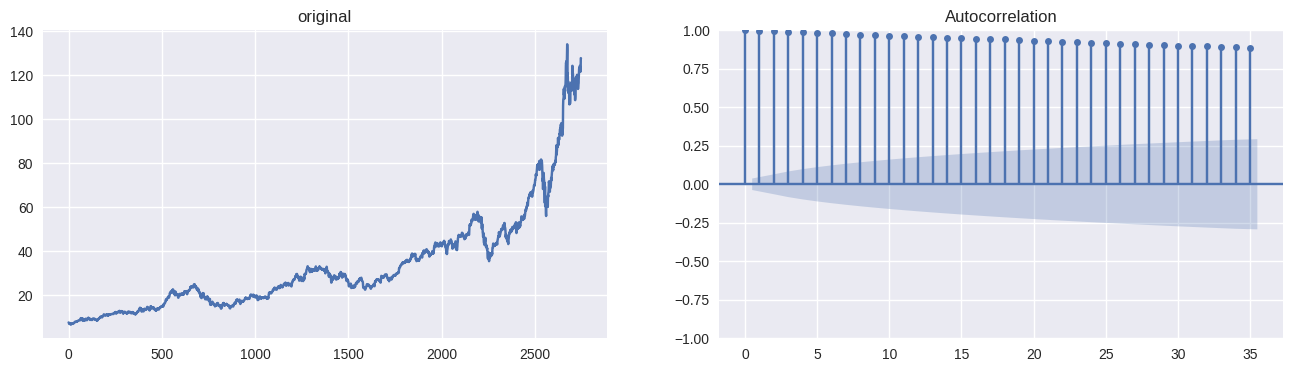

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("original")
plot_acf(df.Close,ax=ax2);

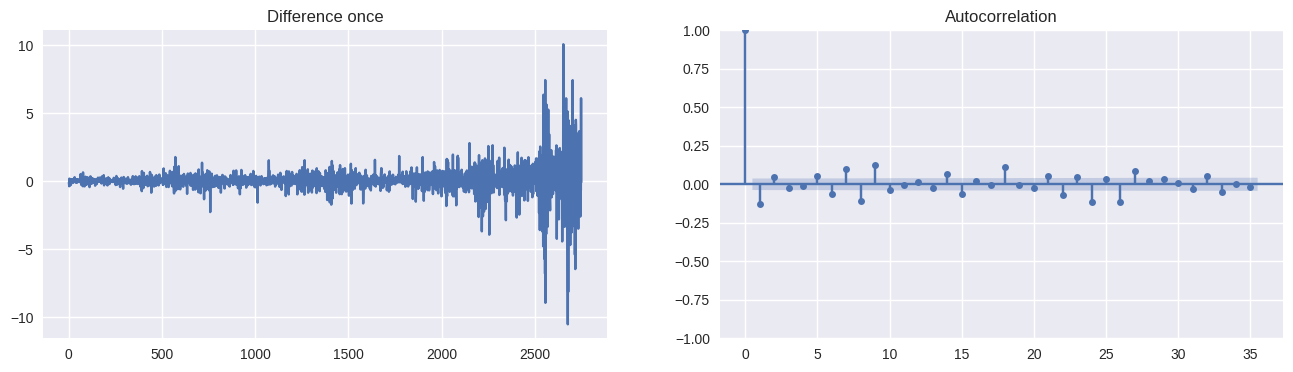

In [ ]:
diff = df.Close.diff().dropna()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff,ax=ax2);


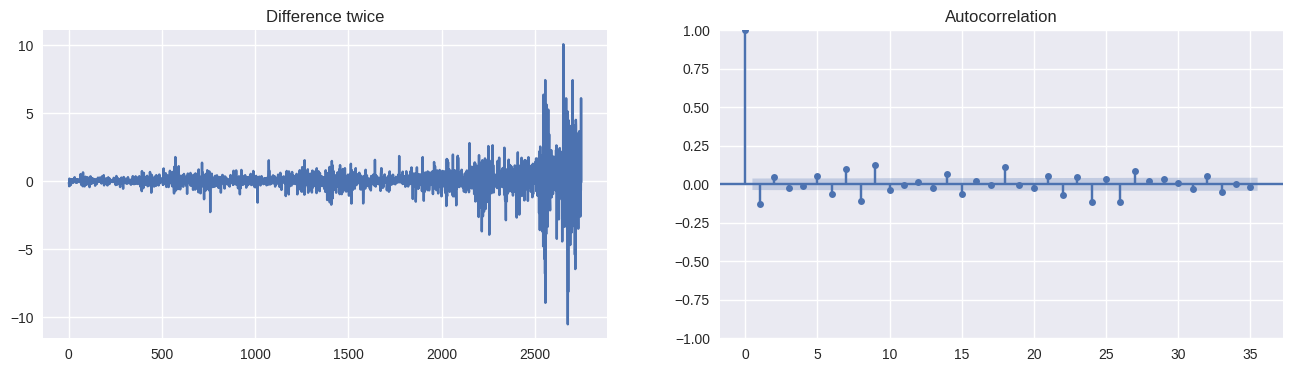

In [ ]:
diff= df.Close.diff().dropna()
fig, (ax1 , ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff,ax=ax2);

In [ ]:
## OUR AUTO CORRELETION IS SIMILAR SO OUR ORDER OF DIFFERENCE IS 1 

In [ ]:
! pip install pmdarima 
from pmdarima.arima.utils import ndiffs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.3 MB/s eta 0:00:00


In [ ]:
ndiffs(df.Close,test="adf")

1

In [ ]:
##P: NUMBER OF LAGS 
from statsmodels.graphics.tsaplots import plot_pacf

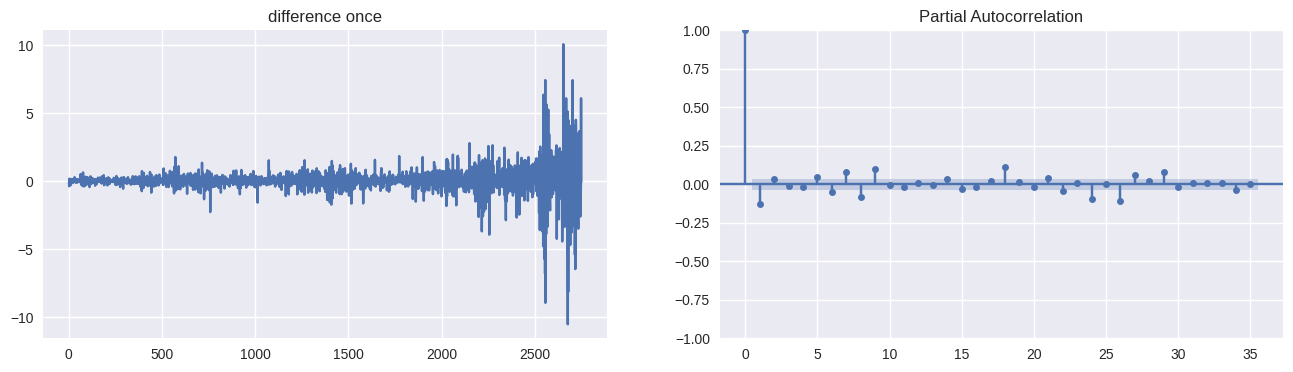

In [ ]:
diff=df.Close.diff().dropna()
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


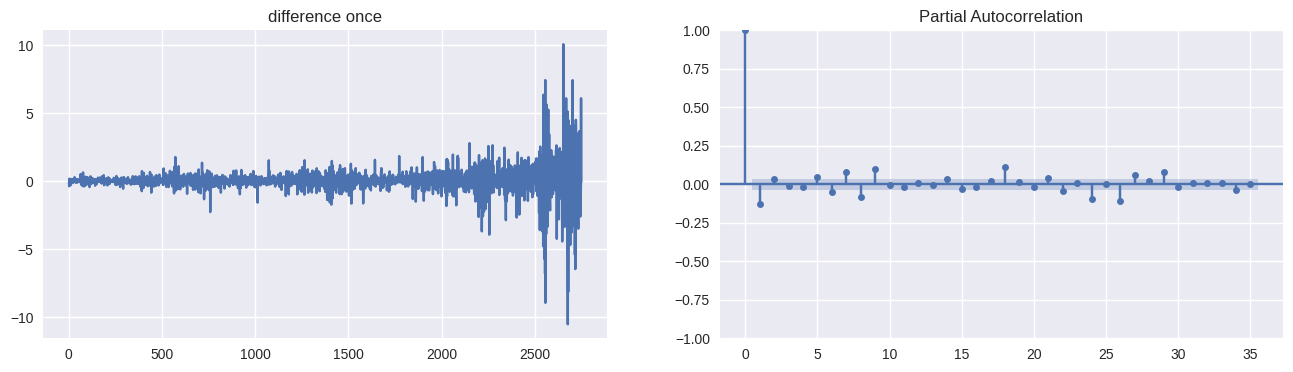

In [ ]:
#Q ORDER OF THE MOVING AVERAGE 
diff=df.Close.diff().dropna()
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

In [ ]:
##Fitting arima model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df.Close,order=(5,2,0))
result= model.fit()


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2749
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -3818.216
Date:                Fri, 14 Apr 2023   AIC                           7648.431
Time:                        18:59:50   BIC                           7683.941
Sample:                             0   HQIC                          7661.261
                               - 2749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9491      0.007   -132.192      0.000      -0.963      -0.935
ar.L2         -0.7159      0.009    -77.056      0.000      -0.734      -0.698
ar.L3         -0.5429      0.009    -63.421      0.000      -0.560      -0.526
ar.L4         -0.3640      0.009    -42.325      0.000      -0.381      -0.347
ar.L5         -0.1196      0.007    -17.144      0.000      -0.133      -0.106
sigma2         0.9433      0.007    144.153      0.000       0.930       0.956
===================================================================================
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):            106685.63
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):              27.66   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

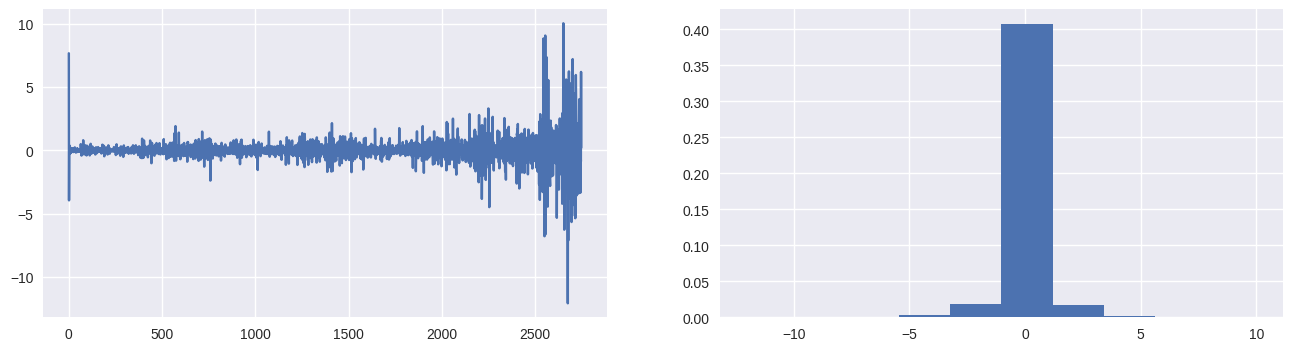

In [ ]:
##plot the residuals 
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True);

